#### This Script contains the following:

1. Import Libraries and Data
2. Setting a Theme for all plots
3. Bar chart of the top 20 starting stations frequencies
4. AVERAGE MONTHLY TEMPERATURE
5. Trip Duration by Season
6. Trip Duration by Bike Type and Season

## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import scipy
from datetime import datetime as dt
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Define the folder path
folderpath = "../Citibike_Project/Data/Prepared_data"

# Load the DataFrame from the pickle file
df = pd.read_pickle(os.path.join(folderpath, 'cleaned_nyc_bike_weather_data.pkl'))

In [5]:
# Check the shape
df.shape

(29838166, 21)

In [230]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'trip_duration', 'month', 'season',
       'value', 'bike_rides_daily', 'log_trip_duration'],
      dtype='object')

In [12]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,date,avgTemp,trip_duration,month,season,value,bike_rides_daily,log_trip_duration
0,BFD29218AB271154,Electric Bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802116,-73.968178,...,-73.945923,Member,2022-01-21,-6.0,528,1,Winter,1,33598,6.270988
1,096AE4C21473D1D6,Electric Bike,2022-01-21 20:32:55.968,2022-01-21 20:35:20.227,Riverside Dr & W 91 St,7524.16,Riverside Dr & W 82 St,7388.10,40.793137,-73.977005,...,-73.981277,Member,2022-01-21,-6.0,144,1,Winter,1,33598,4.976734
2,B3996D7CAEDF7B92,Classic Bike,2022-01-21 09:14:04.856,2022-01-21 09:18:53.000,Henry St & Atlantic Ave,4531.05,Clinton St & Tillary St,4748.07,40.690891,-73.996124,...,-73.991417,Member,2022-01-21,-6.0,288,1,Winter,1,33598,5.666427
3,83AE874442FFF355,Electric Bike,2022-01-21 17:30:27.244,2022-01-21 17:36:00.300,Cleveland Pl & Spring St,5492.05,Rivington St & Ridge St,5406.02,40.722103,-73.997246,...,-73.983299,Member,2022-01-21,-6.0,333,1,Winter,1,33598,5.811141
4,8B1950B6ED5BD50A,Electric Bike,2022-01-21 10:12:57.242,2022-01-21 10:31:37.016,1 Ave & E 62 St,6753.08,Allen St & Rivington St,5414.06,40.761227,-73.960938,...,-73.989975,Member,2022-01-21,-6.0,1119,1,Winter,1,33598,7.021084


In [201]:
df.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name          category
start_station_id            category
end_station_name            category
end_station_id              category
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual                 object
date                  datetime64[ns]
avgTemp                      float32
trip_duration                  int64
month                          int64
season                        object
value                          int64
bike_rides_daily               int64
log_trip_duration            float64
dtype: object

## 2. Setting a Theme for all plots:

In [7]:
sns.set_theme(style='dark',  
              palette=['#1E6091',  # Winter - Cool deep blue  
                       '#2D6A4F',  # Spring - Fresh green  
                       '#FFB703',  # Summer - Warm golden yellow  
                       '#D00000']) # Autumn - Deep red-orange  

In [9]:
# Fix the order of the season column
df['season'] = pd.Categorical(df['season'], 
                              categories=['Winter', 'Spring', 'Summer', 'Fall'], 
                              ordered=True)

## 3. Bar chart of the top 20 starting stations frequencies:

### 3.1. Data Wrangling:

In [11]:
# Subset the data 
df_station_start = pd.DataFrame(df['start_station_name'])

In [13]:
# Create a new column to count the number of rows
df_station_start['value'] = 1

In [15]:
# Count the number of rows for each start station, and find the top 20 by that count
df_station_start = df_station_start.groupby('start_station_name')['value'].count().reset_index()
top_start_stations = df_station_start.nlargest(20, 'value')

In [17]:
top_start_stations

,start_station_name,value
1587,W 21 St & 6 Ave,129016
1718,West St & Chambers St,123289
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106440
8,1 Ave & E 68 St,104856
461,Broadway & E 14 St,98862
485,Broadway & W 25 St,98422
1511,University Pl & E 14 St,97120
463,Broadway & E 21 St,95691
1603,W 31 St & 7 Ave,94208


In [22]:
# Define destination path
destpath = "../Citibike_Project/Data/Prepared_data"

# Export the DataFrame to a pickle file
top_start_stations.to_csv(os.path.join(destpath, 'top_start_stations.csv'))

In [24]:
# Define the folder path
folderpath = "../Citibike_Project/Data/Prepared_data"

# Load the DataFrame from the pickle file
top_start_stations2 = pd.read_csv(os.path.join(folderpath, 'top_start_stations.csv'))

In [26]:
top_start_stations2

,Unnamed: 0,start_station_name,value
0,1587,W 21 St & 6 Ave,129016
1,1718,West St & Chambers St,123289
2,495,Broadway & W 58 St,114293
3,286,6 Ave & W 33 St,106440
4,8,1 Ave & E 68 St,104856
5,461,Broadway & E 14 St,98862
6,485,Broadway & W 25 St,98422
7,1511,University Pl & E 14 St,97120
8,463,Broadway & E 21 St,95691
9,1603,W 31 St & 7 Ave,94208


In [28]:
top_start_stations2.dtypes

Unnamed: 0             int64
start_station_name    object
value                  int64
dtype: object

### 3.2. Chart

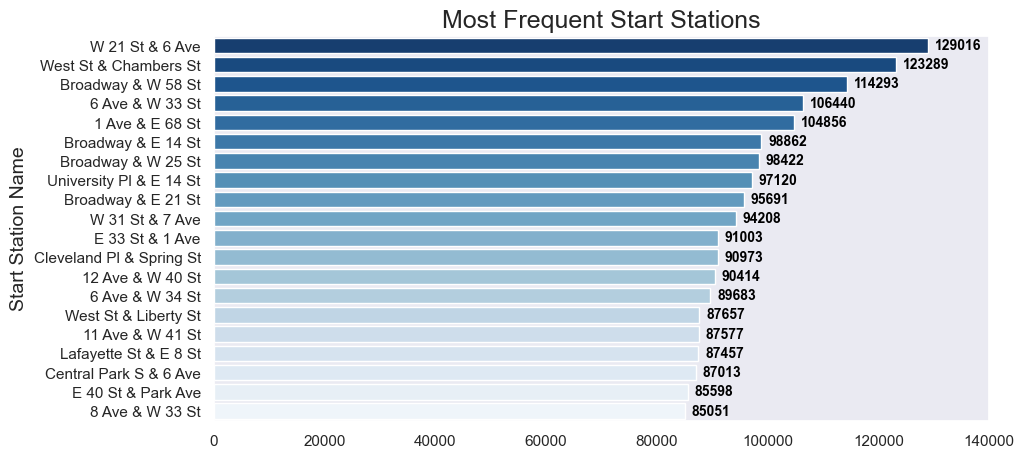

In [40]:
# Create figure and axis objects with subplots() and details
fig, ax = plt.subplots(figsize = (10, 5))

# Use a new color palette, instead of the user-defined palette
with sns.color_palette('Blues_r', n_colors = 20):
    sns.barplot(data = top_start_stations2, # Create the bar plot
                x = 'value', 
                y = 'start_station_name')
    
    # Add labels to bar chart
    for i in ax.containers:
        ax.bar_label(i, fontsize = 10, fontweight=550, padding = 5, color = 'black')

    ax.set_xlim([0, 140000]) # Expand axis to fit lables

    # Set axis labels and titles
    ax.set_xlabel('') 
    ax.set_ylabel('Start Station Name',
             fontsize = 14) 
    plt.title('Most Frequent Start Stations', fontsize = 18)

plt.show()

## 4. AVERAGE MONTHLY TEMPERATURE


### 4.1. Data Wrangling:

In [36]:
# Subset the data 
df_temp = df[['date', 'avgTemp']]

In [38]:
# Reduce data to only include one datapoint per day
df_temp_grouped = df_temp.groupby(['date']).mean().reset_index()

In [40]:
# Set the date column to be the index
df_temp_grouped = df_temp_grouped.set_index('date')

In [42]:
# Calculate the daily number of bike rides using groupby
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [44]:
# Outer merge df_temp_grouped with df_group
df_merged = df_temp_grouped.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df_merged['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 
print("Shape of December 30th is", df[df['date'] == '2022-12-30'].shape) # Check 
print("Shape of December 31st is", df[df['date'] == '2022-12-31'].shape) # Second check 

df_merged = df_merged.set_index('date')

both          365
left_only       0
right_only      0
Name: _merge, dtype: int64
Shape of January 1st is (20428, 21)
Shape of January 2nd is (43009, 21)
Shape of December 30th is (62298, 21)
Shape of December 31st is (31466, 21)


In [46]:
# Ensure the index is a datetime variable
df_merged.index = pd.to_datetime(df_merged.index)

In [52]:
df_merged.head(2)

,avgTemp,bike_rides_daily,_merge
date,,,
2022-01-01,11.6,20428,both
2022-01-02,11.4,43009,both


In [54]:
df_merged.tail(2)

,avgTemp,bike_rides_daily,_merge
date,,,
2022-12-30,9.3,62298,both
2022-12-31,8.2,31466,both


### 4.2. Chart:

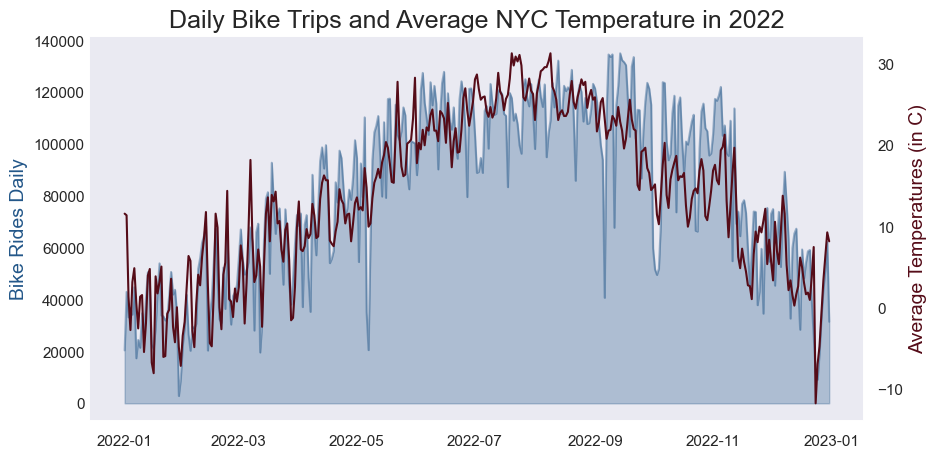

In [106]:
# Create figure and axis objects with subplots() and details
fig, ax = plt.subplots(figsize=(10, 5))
palette = ['#235789', '#B9D6F2', '#F1D302', '#550C18'] # Re-define palette colors

# Make a plot of the bike rides (left y-axis)
sns.lineplot(data = df_merged['bike_rides_daily'],
             color= palette[0],
             alpha = 0.4)
ax.fill_between(df_merged.index, # Fill in the area underneath the plot
                df_merged['bike_rides_daily'], 
                color= palette[0], 
                alpha = 0.3)
ax.set_xlabel('') # Set x-axis label
ax.set_ylabel('Bike Rides Daily', # Set y-axis label
              color = palette[0], 
              fontsize = 14) 
ax.tick_params(axis='y', which='both', length=0) # Eliminate axis tick marks
ax.yaxis.set_ticks_position('none')

# Initialize a twin object for two different y-axes on the sample plot
ax2 = ax.twinx() # Create a second axis for average temperature

# Make a plot of the average temperatures (right y-axis)
sns.lineplot(data = df_merged['avgTemp'],
             color = palette[3], 
             ax = ax2)
ax2.set_ylabel('Average Temperatures (in C)', # Set y-axis label
               color = palette[3],
               fontsize = 14)
ax2.yaxis.set_ticks_position('none') # Eliminate axis tick marks

# Set titles
plt.title('Daily Bike Trips and Average NYC Temperature in 2022', 
          fontsize = 18)
# Save the figure to a file
plt.savefig('Visualizations/DailyTrips_AverageNYC_Temperature.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Trip Duration by Season

### 5.1. Data Wrangling:

In [131]:
# Subset the data to reduce memory load
df_season = df[['ride_id', 'season', 'trip_duration']]

In [133]:
df_season.head()


,ride_id,season,trip_duration
0,BFD29218AB271154,Winter,528
1,096AE4C21473D1D6,Winter,144
2,B3996D7CAEDF7B92,Winter,288
3,83AE874442FFF355,Winter,333
4,8B1950B6ED5BD50A,Winter,1119


In [135]:
# Calculations for styling the median value labels
medians = df_season.groupby(['season'])['trip_duration'].median()
vertical_offset = df_season['trip_duration'].median() * 0.05 # offset from median for display

### 5.2 Box Plot:

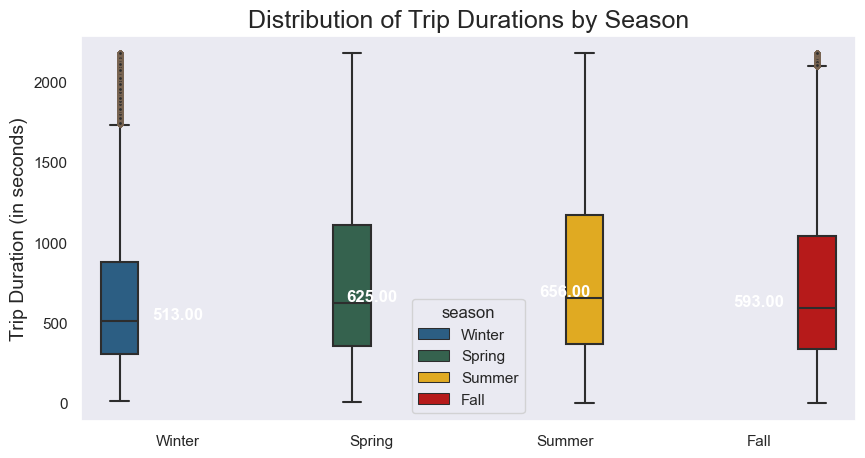

In [141]:
# Create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(10, 5))

# Make a box plot
box = sns.boxplot(x='season', 
                  y='trip_duration', 
                  data=df_season, 
                  hue='season', 
                  flierprops={'marker': 'o',  # Control the formatting of the outlier markers
                              'markersize': 3,
                              'markeredgecolor': '#786452'})

# Calculate medians for each season
medians = df_season.groupby('season')['trip_duration'].median()

# Include median data labels for each season
vertical_offset = 10  # Adjust as needed
for x in box.get_xticks():
    # Position the text label slightly above the median for clarity
    box.text(x, 
             medians.iloc[int(x)] + vertical_offset,  # y-axis position
             f'{medians.iloc[int(x)]:.2f}',  # Display the median value
             horizontalalignment='center',
             fontsize=12,
             color='w',
             weight='semibold')

# Set axis labels and title
ax.set_xlabel('') 
ax.set_ylabel('Trip Duration (in seconds)', fontsize=14)
plt.title('Distribution of Trip Durations by Season', fontsize=18)

# Save the figure (make sure the path is correct)
plt.savefig('trip_duration_by_season.png')

# Display the plot
plt.show()

#### Insights from box plot: 
In this visualization we can see that trip duration is slightly correlated to season, trips are shortest in the winter and longest in the summer.
The pattern makes intuitive sense because as the weather warms up, users are both take more and longer trips than they do in the winter.


## 6. Trip Duration by Bike Type and Season

### 6.1. Data Wrangling:

In [148]:
# Subset the data to reduce memory load
df_facet = df[['ride_id', 'rideable_type', 'season', 'trip_duration']]

In [150]:
df_facet.head()

,ride_id,rideable_type,season,trip_duration
0,BFD29218AB271154,Electric Bike,Winter,528
1,096AE4C21473D1D6,Electric Bike,Winter,144
2,B3996D7CAEDF7B92,Classic Bike,Winter,288
3,83AE874442FFF355,Electric Bike,Winter,333
4,8B1950B6ED5BD50A,Electric Bike,Winter,1119


### 6.2. Facet Grid

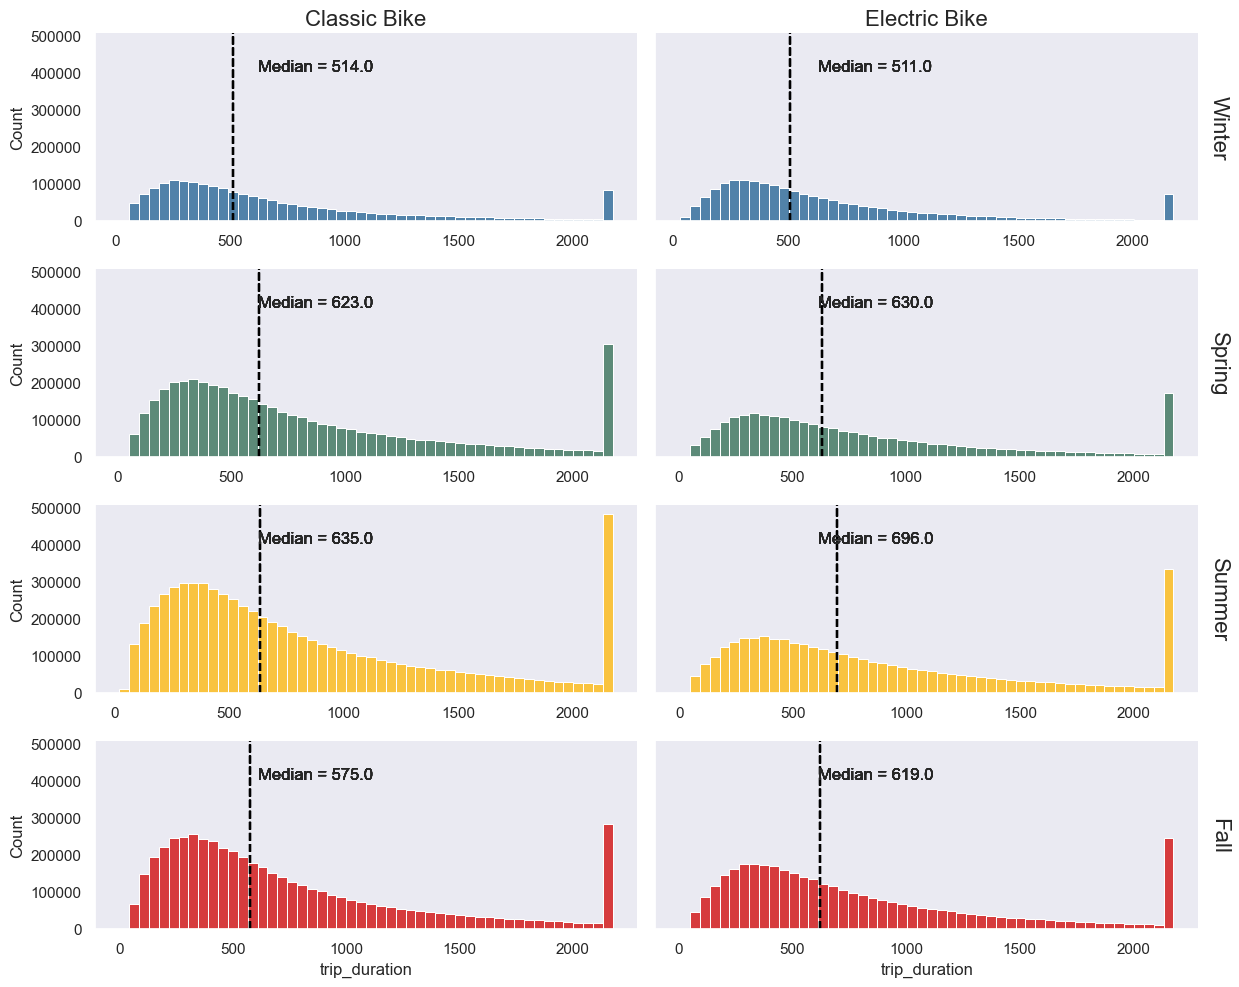

In [156]:
# Create the facet grid
grid = sns.FacetGrid(df_facet, 
                     col = 'rideable_type', # Set the bike type to be the column variable
                     row = 'season', # Set the season to be the row variable
                     hue = 'season',
                     margin_titles = True, # Place the variables on the sides of the grid
                     height = 2.5,
                     aspect = 2.5,
                     sharex = False)

# Look at the distribution of trip duration by the facets
grid.map(sns.histplot, 
         'trip_duration', 
         bins = 50)

# Add annotations for the median trip duration for each facet
axes = grid.axes.flatten()

def annotate(data, **kws):
    for i, ax in enumerate(axes):
        ax = plt.gca()
        n = data.trip_duration.median()
        ax.text(.3, .8, "Median = {:.1f}".format(n), transform = ax.transAxes)
        ax.axvline(x = n, color = 'black', linestyle = '--')

grid.map_dataframe(annotate)
# Set titles
grid.set_titles(col_template = '{col_name}', 
                row_template = '{row_name}',
                size = 16)
# Save the figure to a file
plt.savefig('Visualizations/Faced_grid.png', dpi=300, bbox_inches='tight')
plt.show()

#### Insights from the Faceted Grid Plot:
**Trip Duration Distribution:**

The trip duration distributions for both Classic and Electric bikes are right-skewed.
There is a noticeable peak in trip durations around 500-700 seconds.

**Seasonal Trends:**

**Winter:** The median trip duration is lower (~514s for Classic, ~511s for Electric), suggesting fewer or shorter trips in colder weather.
**Spring & Summer:** The median trip durations increase across both bike types, peaking in Summer (635s for Classic, 696s for Electric), indicating higher usage.
**Fall:** The median drops slightly (575s for Classic, 619s for Electric) compared to summer but remains above winter.

**Classic vs. Electric Bikes:**

Electric bikes have slightly higher median durations in Spring, Summer, and Fall, suggesting that riders might take longer trips with electric assistance.

In Winter, both bike types have nearly identical medians, implying similar usage patterns.